In [1]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
# 서울외국환중개 환율 데이터 로드
exchange = pd.read_csv('../data/환율.csv')

In [3]:
# 데이터 확인
exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824 entries, 0 to 7823
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7824 non-null   object 
 1   open    7824 non-null   float64
 2   high    7824 non-null   float64
 3   low     7824 non-null   float64
 4   close   7824 non-null   float64
dtypes: float64(4), object(1)
memory usage: 305.8+ KB


In [4]:
exchange.describe()

,open,high,low,close
count,7824.000000,7824.000000,7824.000000,7824.000000
mean,1024.510941,1031.471958,1024.784771,1025.439251
std,377.283736,374.839810,371.127579,376.284006
min,0.000000,0.000000,0.000000,0.000000
25%,1016.750000,1019.500000,1015.650000,1016.875000
50%,1130.000000,1132.800000,1127.100000,1129.550000
75%,1199.925000,1203.000000,1196.000000,1199.100000
max,1940.000000,1999.000000,1940.000000,1965.000000


In [5]:
# OHLC의 0을 nan으로 치환
for col in ['open', 'high', 'low', 'close'] :
    exchange.loc[exchange[col] == 0, col] = np.nan

In [6]:
# 데이터 재확인
exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824 entries, 0 to 7823
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7824 non-null   object 
 1   open    7001 non-null   float64
 2   high    7027 non-null   float64
 3   low     7027 non-null   float64
 4   close   7007 non-null   float64
dtypes: float64(4), object(1)
memory usage: 305.8+ KB


In [7]:
exchange.describe()

,open,high,low,close
count,7001.000000,7027.000000,7027.000000,7007.000000
mean,1144.946950,1148.461164,1141.015519,1145.003097
std,145.485218,148.547925,143.944003,145.535293
min,777.300000,778.300000,777.300000,777.400000
25%,1074.000000,1075.700000,1071.000000,1073.950000
50%,1141.000000,1144.200000,1137.300000,1141.000000
75%,1208.000000,1212.000000,1205.000000,1208.200000
max,1940.000000,1999.000000,1940.000000,1965.000000


In [8]:
# 주말 데이터 삭제
exchange['weekday'] = exchange['date'].map(lambda x : pd.to_datetime(x)).dt.weekday
exchange = exchange.loc[exchange['weekday'] < 5, : ]
exchange.drop('weekday', axis=1, inplace=True)

In [9]:
exchange.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7319 entries, 0 to 7823
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7319 non-null   object 
 1   open    7001 non-null   float64
 2   high    7027 non-null   float64
 3   low     7027 non-null   float64
 4   close   7007 non-null   float64
dtypes: float64(4), object(1)
memory usage: 343.1+ KB


In [10]:
# investing.com의 환율 데이터 로드
invest1 = pd.read_csv('../data/USD_KRW 과거 데이터 (1).csv')
invest2 = pd.read_csv('../data/USD_KRW 과거 데이터.csv')
invest = pd.concat([invest1, invest2])
invest.sort_values('date', inplace=True)
invest.reset_index(drop=True,inplace=True)

In [11]:
# 데이터 확인
invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7718 entries, 0 to 7717
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7718 non-null   object
 1   close   7718 non-null   object
 2   open    7718 non-null   object
 3   high    7718 non-null   object
 4   low     7718 non-null   object
dtypes: object(5)
memory usage: 301.6+ KB


In [12]:
invest.head(10)

,date,close,open,high,low
0,1996- 01- 02,775.70,775.80,775.80,775.80
1,1996- 01- 03,778.40,775.25,778.75,774.33
2,1996- 01- 04,787.10,778.00,787.95,777.73
3,1996- 01- 05,788.10,786.65,788.75,784.25
4,1996- 01- 08,788.10,788.15,791.85,787.60
5,1996- 01- 09,787.00,787.50,789.35,786.55
6,1996- 01- 10,787.80,786.45,788.25,785.60
7,1996- 01- 11,792.00,787.70,792.10,787.70
8,1996- 01- 12,790.50,791.10,793.35,789.55
9,1996- 01- 15,791.50,789.60,791.85,789.60


In [13]:
invest.tail(10)

,date,close,open,high,low
7708,2025- 07- 29,"1,388.39","1,389.93","1,396.49","1,386.39"
7709,2025- 07- 30,"1,393.18","1,388.36","1,395.97","1,378.10"
7710,2025- 07- 31,"1,392.47","1,393.18","1,398.87","1,385.79"
7711,2025- 08- 01,"1,389.03","1,392.93","1,406.77","1,383.50"
7712,2025- 08- 03,"1,391.18","1,388.79","1,391.18","1,390.16"
7713,2025- 08- 04,"1,385.57","1,389.04","1,391.18","1,380.42"
7714,2025- 08- 05,"1,386.79","1,385.59","1,393.74","1,382.10"
7715,2025- 08- 06,"1,384.67","1,386.48","1,391.80","1,383.82"
7716,2025- 08- 07,"1,383.70","1,384.81","1,388.60","1,378.16"
7717,2025- 08- 08,"1,388.83","1,383.41","1,392.43","1,379.35"


In [14]:
for col in invest.columns[1:] :
    invest[col] = (invest[col].str.replace(',','')).astype(float)

In [15]:
invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7718 entries, 0 to 7717
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7718 non-null   object 
 1   close   7718 non-null   float64
 2   open    7718 non-null   float64
 3   high    7718 non-null   float64
 4   low     7718 non-null   float64
dtypes: float64(4), object(1)
memory usage: 301.6+ KB


In [16]:
invest.describe()

,close,open,high,low
count,7718.000000,7718.000000,7718.000000,7718.000000
mean,1147.759839,1148.578307,1154.271016,1143.350579
std,147.290576,147.155267,150.820803,144.700757
min,775.700000,775.250000,775.800000,521.900000
25%,1076.442500,1077.137500,1080.840000,1073.492500
50%,1145.655000,1146.325000,1151.450000,1141.540000
75%,1218.105000,1221.075000,1226.962500,1214.510000
max,1960.000000,1905.000000,1997.500000,1835.000000


In [17]:
# 날짜 형식 통일
invest['date'] = invest['date'].str.replace('- ', '.')

In [18]:
# 서울외국환중개에서 받은 환율 데이터의 nan을 investing.com의 데이터로 대체
for col in exchange.columns[1:] :
    for idx in exchange.loc[exchange[col].isna(), : ].index :
        day = exchange.loc[idx, 'date']
        try :
            exchange.loc[idx, [col]] = invest.loc[invest['date'] == day, col].values[0]
        except :
            pass

In [19]:
# 데이터 확인
exchange.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7319 entries, 0 to 7823
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7319 non-null   object 
 1   open    7319 non-null   float64
 2   high    7319 non-null   float64
 3   low     7319 non-null   float64
 4   close   7319 non-null   float64
dtypes: float64(4), object(1)
memory usage: 601.1+ KB


In [20]:
exchange.describe()

,open,high,low,close
count,7319.000000,7319.000000,7319.000000,7319.000000
mean,1148.423505,1152.122973,1144.652737,1148.204405
std,146.920326,149.321148,144.885180,146.814042
min,775.250000,778.300000,774.330000,777.400000
25%,1076.600000,1079.450000,1074.000000,1076.800000
50%,1146.000000,1148.900000,1143.000000,1146.000000
75%,1220.000000,1223.850000,1216.050000,1219.300000
max,1940.000000,1999.000000,1940.000000,1965.000000


In [21]:
exchange.to_csv('../data/USD_KRW.csv', index=False)

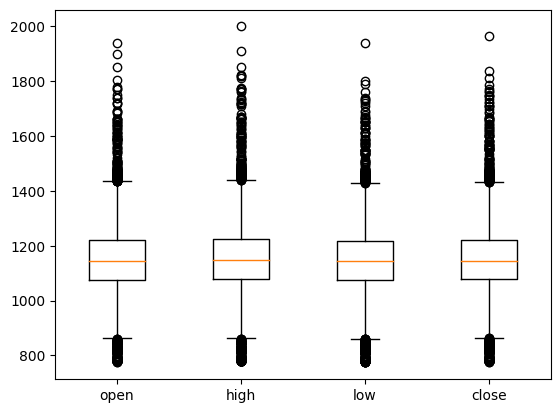

In [88]:
plt.boxplot(
    [exchange['open'], exchange['high'], exchange['low'], exchange['close']],
    labels = ['open', 'high', 'low', 'close']
)
plt.show()

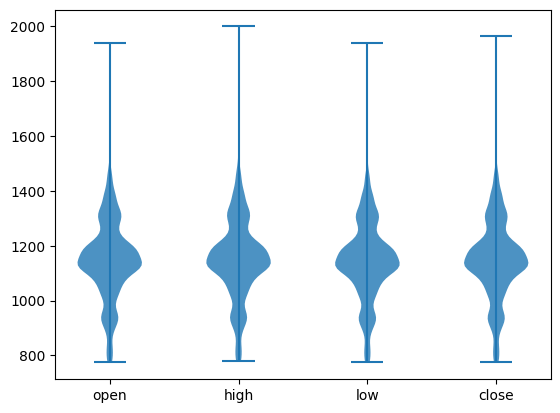

In [99]:
fig, ax = plt.subplots()
parts = ax.violinplot(
    [exchange['open'], exchange['high'], exchange['low'], exchange['close']],
    positions=np.arange(1, 5)
)

for pc in parts['bodies']:
    pc.set_alpha(0.8)

labels = ['open', 'high', 'low', 'close']
ax.set_xticks(np.arange(1, 5))
ax.set_xticklabels(labels)

plt.show()

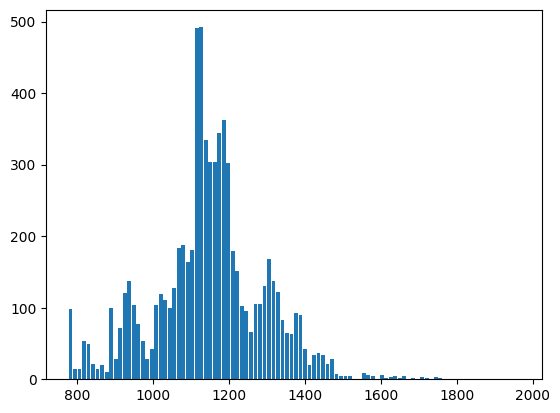

In [95]:
plt.hist(exchange['close'], bins = 100, width = 10)
plt.show()

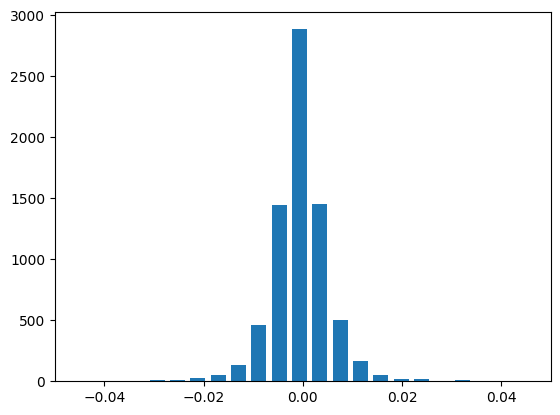

In [ ]:
# 종가 일변화율 확인
dayrate = ((exchange['close'] - exchange['close'].shift())/exchange['close'].shift()).fillna(0)
plt.hist(dayrate, bins = 100, width = 0.003)
plt.xlim(-0.05,0.05)
plt.show()